# MACHINE LEARNING
**Lab-09: KERAS / TENSORFLOW**

---
*IDE: Colaboratory / Google Colab*

*Nguyen Duy Thanh - MSSV:18110013*

*email: duythanh.ndt273@gmail.com or 18110013@stduent.hcmus.edu.vn*

In [1]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [2]:
#Kiểm tra version của keras
keras.__version__

'2.5.0'

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


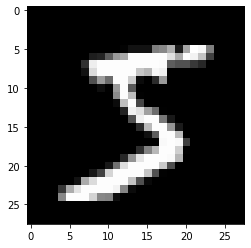

Ảnh thứ 2 của tập train
Label thứ 2 của tập train:  0


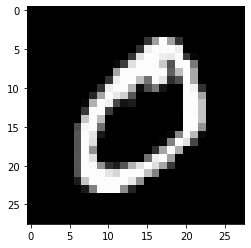

In [3]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào (dùng ảnh trắng đen)
## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

## in thử ảnh một ảnh
print("Ảnh thứ 2 của tập train")
print("Label thứ 2 của tập train: ", y_train[1])
plt.imshow(X_train[1], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

## Câu 1 : Hãy tạo và huấn luyện một mạng no-ron theo cấu trúc sau trên tập MNIST

In [4]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(inputs_reshape)
print("Kích thước flatten: {}".format(flatten.shape))

dense1= keras.layers.Dense(units=200,activation="relu")(flatten)
print("Kích thước fc1: {}".format(dense1.shape))

dense2= keras.layers.Dense(units=100,activation="relu")(dense1)
print("Kích thước fc2: {}".format(dense2.shape))

dense3= keras.layers.Dense(units=50,activation="relu")(dense2)
print("Kích thước fc3: {}".format(dense3.shape))

dense4= keras.layers.Dense(units=20,activation="relu")(dense3)
print("Kích thước fc4: {}".format(dense4.shape))


## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(dense4)

## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước flatten: (None, 784)
Kích thước fc1: (None, 200)
Kích thước fc2: (None, 100)
Kích thước fc3: (None, 50)
Kích thước fc4: (None, 20)
Cấu trúc của model: 
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)      

In [5]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 20s 7ms/step - loss: 0.6190 - accuracy: 0.8134 - val_loss: 0.1534 - val_accuracy: 0.9537
Epoch 2/10
540/540 [==============================] - 3s 6ms/step - loss: 0.1313 - accuracy: 0.9613 - val_loss: 0.1091 - val_accuracy: 0.9682
Epoch 3/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.0940 - val_accuracy: 0.9743
Epoch 4/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0952 - val_accuracy: 0.9715
Epoch 5/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.1007 - val_accuracy: 0.9690
Epoch 6/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0921 - val_accuracy: 0.9753
Epoch 7/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.1017 - val_accuracy: 0.9718
Epoch

## Câu 2 : Nêu cách tính các kết quả có trong Param # ở câu 1



*   Lớp input : Thực hiện nhiệm vụ là nhận dữ liệu do ta truyền vào nên không cần phải học gì. Do đó parameters cho trường hợp này bằng 0.
*   Lớp flatten : Thực hiện nhiệm vụ là đưa data về 1 vector nên cũng không thực hiện quá trình học nào cả. Do đó parameters cho trường hợp này bằng 0.
*   Lớp dense ( Lớp Fully conntected layer ) : Thực hiện nhiệm vụ nối từng node của lớp phía trước với tất cả các node của lớp hiện tại nên sẽ tốn công để học nó. Do đó parameters cho trường hợp này sẽ được tính bởi công thức :
$$\text{Parameters} =  \text{Number of nodes of the current layer} *(\text{Number of nodes of previous layer}+ 1)$$ 
Trong đó việc cộng thêm 1 là do ta tính thêm node bias.

Ta tính toán cụ thể cho câu 1 như sau :


*   Với lớp dense đầu tiên (dense) : số lượng node của lớp trước chính là số lượng node của input : 784 , số lượng node của lớp hiện tại ta xét là 200. Khi đó ta tính được số Parameters = 200*(784+1) = 15700.

*    Với lớp dense thứ 2 ( dense_1 ) : số lượng node của lớp trước : 200 , số lượng node của lớp hiện tại ta xét là 100. Khi đó ta tính được số Parameters = 100*(200+1) = 20100. 

*    Với lớp dense thứ 3 ( dense_2 ) : số lượng node của lớp trước : 100 , số lượng node của lớp hiện tại ta xét là 50. Khi đó ta tính được số Parameters = 50*(100+1) = 5050. 

*   Với lớp dense thứ 4 ( dense_3 ) : số lượng node của lớp trước : 50 , số lượng node của lớp hiện tại ta xét là 20. Khi đó ta tính được số Parameters = 20*(50+1) = 1020. 

*   Với lớp dense thứ 5 ( dense_4 hay output ) : số lượng node của lớp trước : 20 , số lượng node của lớp hiện tại (output) ta xét là 10. Khi đó ta tính được số Parameters = 10*(20+1) = 210. 







## Câu 3 : Cấu trúc ở câu 1 có thể được áp dụng cho bài toán regression được không, nếu có thì phải thay đổi như thế nào ?

Cấu trúc ở câu 1 có thể áp dụng được cho bài toán regression vì cấu trúc của mạng neural để giải bài toán regression tương đối giống với việc giải bài toán classification. Chúng chỉ khác nhau ở hàm activation của lớp output đó là với bài toán classification thì output hàm softmax còn bài toán regression là hàm linear. Do đó chúng ta chỉ cần thay đổi hàm activation về linear là có thể áp dụng được đối với bài toán regression.

## Câu 4 : Thiết kế một mạng Convolution 2D :

In [6]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))

## Tạo Convolutional Layer
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

## Maxpooling 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)
print("Kích thước sau maxpool: {}".format(maxpool.shape))

conv1 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='valid',
                                 activation=tf.nn.relu)(maxpool)
print("Kích thước conv1: {}, chiều cuối cùng chính là số filter".format(conv1.shape))
## Maxpooling
### pool_size: kích thước pool để lấy max
### strides: bước dịch của pool 
maxpool1 = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv1)
print("Kích thước sau maxpool1: {}".format(maxpool1.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(maxpool1)
print("Kích thước flatten: {}".format(flatten.shape))

dense1= keras.layers.Dense(units=40,activation="relu")(flatten)
print("Kích thước fc1: {}".format(dense1.shape))

dense2= keras.layers.Dense(units=20,activation="relu")(dense1)
print("Kích thước fc2: {}".format(dense2.shape))


## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(dense2)

## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước conv: (None, 28, 28, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (None, 14, 14, 20)
Kích thước conv1: (None, 10, 10, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool1: (None, 5, 5, 20)
Kích thước flatten: (None, 500)
Kích thước fc1: (None, 40)
Kích thước fc2: (None, 20)
Cấu trúc của model: 
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
___________________________________________

In [7]:
####Training####
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 50s 89ms/step - loss: 0.7327 - accuracy: 0.7690 - val_loss: 0.1283 - val_accuracy: 0.9595
Epoch 2/10
540/540 [==============================] - 48s 89ms/step - loss: 0.1130 - accuracy: 0.9650 - val_loss: 0.0791 - val_accuracy: 0.9740
Epoch 3/10
540/540 [==============================] - 48s 89ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0613 - val_accuracy: 0.9820
Epoch 4/10
540/540 [==============================] - 48s 88ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0584 - val_accuracy: 0.9832
Epoch 5/10
540/540 [==============================] - 49s 90ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0684 - val_accuracy: 0.9790
Epoch 6/10
540/540 [==============================] - 49s 91ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 7/10
540/540 [==============================] - 48s 89ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0514 - val_accuracy: